In [1]:
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from keras.datasets import cifar10
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.transform import resize
from keras import layers

Using TensorFlow backend.


In [0]:
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#loading the training and testing data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


170500096/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
#Pre-processing the dataset
from tensorflow.keras.applications.densenet import preprocess_input
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [0]:
#one -hot encoding of the  class values
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Densenet model
from tensorflow.keras.applications.densenet import DenseNet121

base_model = DenseNet121(
    weights=None,
    include_top=True,
    input_shape=(32,32,3),
    classes=10
)

# Expand this cell for the model summary
base_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
_______

In [0]:
model=base_model

In [0]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:

from tensorflow.keras import layers, optimizers, regularizers, callbacks
checkpoint = callbacks.ModelCheckpoint(
    'model.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)

# Train the model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    validation_split=0.1,
    epochs=20,
    callbacks=[checkpoint],
    verbose=1
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 149s 3ms/sample - loss: 1.4597 - acc: 0.4749 - val_loss: 1.6456 - val_acc: 0.4876
Epoch 2/20
45000/45000 [==============================] - 54s 1ms/sample - loss: 1.0870 - acc: 0.6186 - val_loss: 9.5918 - val_acc: 0.4864
Epoch 3/20
45000/45000 [==============================] - 55s 1ms/sample - loss: 0.8906 - acc: 0.6898 - val_loss: 0.8764 - val_acc: 0.6994
Epoch 4/20
45000/45000 [==============================] - 55s 1ms/sample - loss: 0.7368 - acc: 0.7436 - val_loss: 0.8129 - val_acc: 0.7282
Epoch 5/20
45000/45000 [==============================] - 55s 1ms/sample - loss: 0.7355 - acc: 0.7443 - val_loss: 0.6986 - val_acc: 0.7590
Epoch 6/20
45000/45000 [==============================] - 54s 1ms/sample - loss: 0.6226 - acc: 0.7853 - val_loss: 0.7430 - val_acc: 0.7496
Epoch 7/20
45000/45000 [==============================] - 55s 1ms/sample - loss: 0.5186 - acc: 0.8188 - val_loss: 0.

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 7s 748us/sample - loss: 0.9897 - acc: 0.7771


In [14]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.9896730479717255
Test accuracy: 0.7771


In [0]:
import matplotlib.pyplot as plt
def draw_plots(res):
    import pandas as pd
    df = pd.DataFrame()
    df['train_loss'] = res.history['loss']
    df['val_loss'] = res.history['val_loss']
    df['train_acc'] = res.history['acc']
    df['val_acc'] = res.history['val_acc']
    df.index = np.arange(1,len(df)+1,1)
    
    # draw Loss
    df[['train_loss', 'val_loss']].plot()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # draw Acc
    df[['train_acc', 'val_acc']].plot()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    return df

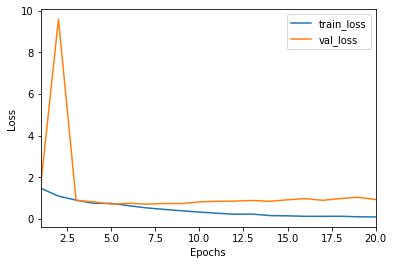

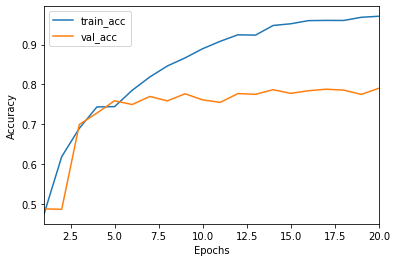

In [16]:
res_df = draw_plots(history)

In [0]:
#Saving the log 
import pandas as pd
a=pd.DataFrame.from_dict(history.history)
a.to_csv("LogScratch.csv") 

#saving the model
model.save('Scratch1.h5')